 # COVID 19 state wise analytics
# Finding Indian states which are at high risk of encountering COVID 3rd Wave
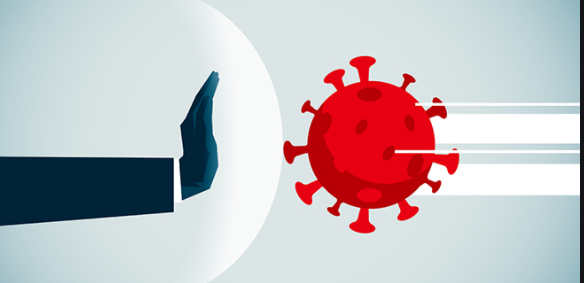




# Finding Indian states which are at high risk of encountering COVID 3rd Wave

Some plots are interactive. Try to hover it for better results

In [ ]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#importing the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv')
df

In [ ]:
#renaming the columns 

df.columns = ['state','total_cases','active','discharged','death','active_ratio','discharged_ratio','death_ratio']
df

In [ ]:
df.describe().T

In [ ]:
#active ratio distribution 

df['active_ratio'].plot(kind='hist',bins =10,title='active ratio percentage')
plt.xlabel('value in percentage')
plt.show()

In [ ]:
 ratio = ['active_ratio','death_ratio','discharged_ratio']
    
for values in ratio:
    df[values].plot(kind='hist',bins =10)
    plt.title('{valname} percentage'.format(valname = values))
    plt.xlabel('value in percentage')
    plt.show()

In [ ]:
#acctive cases which are exceeding than the normal

plt.figure(figsize = (15,5))
sns.boxplot(df['active'])
plt.show()

In [ ]:
cases_hist = ['total_cases','discharged']

for history in cases_hist:
    box_figure = px.box(df,x=history,hover_data =['state'])
    box_figure.show()

In [ ]:
df.columns

In [ ]:
total_case_sort = df.sort_values(by='total_cases',ascending = False)
plt.figure(figsize= (10,10))
sns.barplot(data = total_case_sort,x ='state',y='total_cases')
plt.xticks(rotation = 90)
plt.show()

Maharastra, Kerala, karnataka and TN had a lot of cases in India

In [ ]:
sns.catplot(data = df,x ='state',y='active',kind="bar",height = 4,aspect =3)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
status =[]

for vals in df['active']:
    if vals>10000:
        status.append('high')
    else:
        status.append('low')
        
status

In [ ]:
#adding a new column to the dataset

df['status_of_cases'] = status
df

In [ ]:
#using status of cases as filter

figure = px.bar(df,x = 'state',y ='total_cases',color='status_of_cases')
figure.show()

In [ ]:
sns.pairplot(df[['active','death','total_cases']])

In [ ]:
sns.pairplot(df[['active_ratio', 'discharged_ratio', 'death_ratio']])

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
fig = px.scatter(df, x="total_cases", y="active", size="death", color='state',size_max = 40)
fig.show()

In [ ]:
sorted_data = df.sort_values(by='death_ratio', ascending=False).head(10)
plt.bar(sorted_data['state'],sorted_data['death_ratio'])

plt.xlabel('state')
plt.ylabel('Percentage(death ratio)')
plt.title('highest number of deaths')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import geopandas
from cartopy import crs as ccrs

In [ ]:
mapping = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state',
    color='active',
    color_continuous_scale='Reds'
)

mapping.update_geos(fitbounds="locations")

mapping.show()

> # *From our visualizations we can infer that Kerala, Karnataka, Tamil Nadu, AP and Maharastra are at high risks of having a COVID 3 rd wave. Therefore it is vital to concentrate on such locations in order to remove the risk.*

### Upvote if you find this useful : ) 

## Thanks! Happy analysing 